Мохляков П.А. \
М8О-408Б-19 \
Вариант 3

## Лабораторная работа 1

In [103]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time

### Задача классификации для двух классов

In [104]:
X_train = np.array([[-2.8, -0.1],
                    [4, 0.7],
                    [3.4, 2.3],
                    [0.8, -2.6],
                    [1.6, -4.2],
                    [1.2, 1.6]
                    ])
y_train = np.array([1, 0, 0, 1, 1, 1])

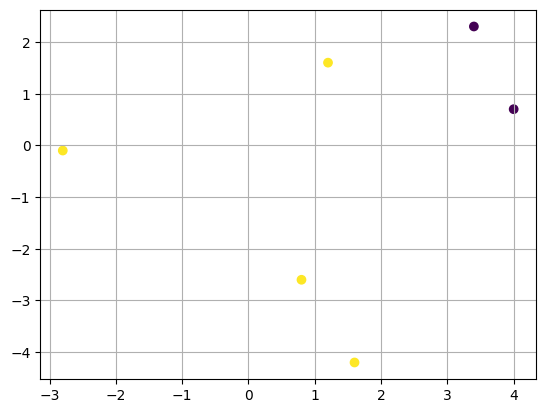

In [105]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train)

Создаем линейную модель

In [106]:
perceptron = keras.Sequential([
        layers.Dense(1,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)
perceptron.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sigmoid (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Компилируем модель

In [107]:
perceptron.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем

Fit time: 8.83s
Result MSE: 0.01835118606686592
Result MAE: 0.10884887725114822


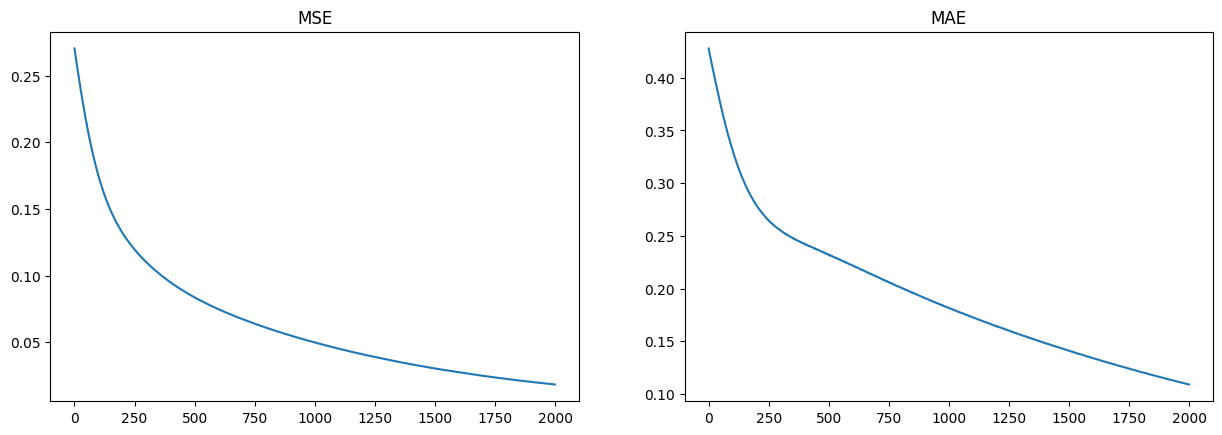

In [108]:
epochs = 2000
time_start = time.time()
hist = perceptron.fit(
    X_train, y_train,
    batch_size=1,
    epochs=epochs,
    verbose=0,
    shuffle=True
    )
time_finish = time.time()
mse_loss, mae_loss = perceptron.evaluate(X_train, y_train, verbose=0)

print(f'Fit time: {(time_finish - time_start):.{2}f}s')
print(f'Result MSE: {mse_loss}')
print(f'Result MAE: {mae_loss}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])


Плучаем веса и строим дискриминантную линию

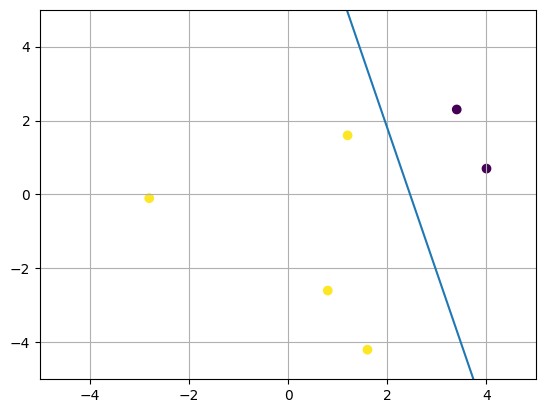

In [109]:
weights = perceptron.layers[0].get_weights()
discriminant_line = lambda x: (weights[0][0]*x  + weights[1][0]) / -weights[0][1]
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [discriminant_line(-6),discriminant_line(6)])

### 4 линейноразделимых класса

In [110]:
X_four_train = np.array([
    [-1.8, -0.5],
    [2.1, 3.8],
    [2.2, -4.9],
    [1.7, -0.7],
    [-0.7, 3.9],
    [3.1, -1.8],
    [-2.6, -1.6],
    [-1.3, 0.4]
    ])
y_four_train = np.array([
    [0, 1],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [1, 0], 
    [0, 1],
    [0, 0]
    ])

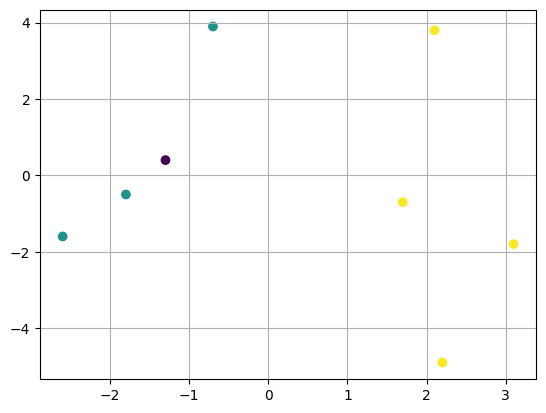

In [111]:
plt.grid()
x_points = [x[0] for x in X_four_train]
y_points = [x[1] for x in X_four_train]
colors = [y[0]*2 + y[1] for y in y_four_train]
plt.scatter(x_points, y_points, c = colors)

Создаем линейную модель

In [112]:
perceptron_four_classes = keras.Sequential([
        layers.Dense(2,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)
perceptron.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sigmoid (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Компилируем модель

In [113]:
opt = keras.optimizers.Adam(learning_rate=0.01)
perceptron_four_classes.compile(loss='mse', optimizer=opt, metrics=['mae'])

Тренеруем

Fit time: 17.08s
Result MSE: 0.5000037550926208
Result MAE: 0.5007670521736145


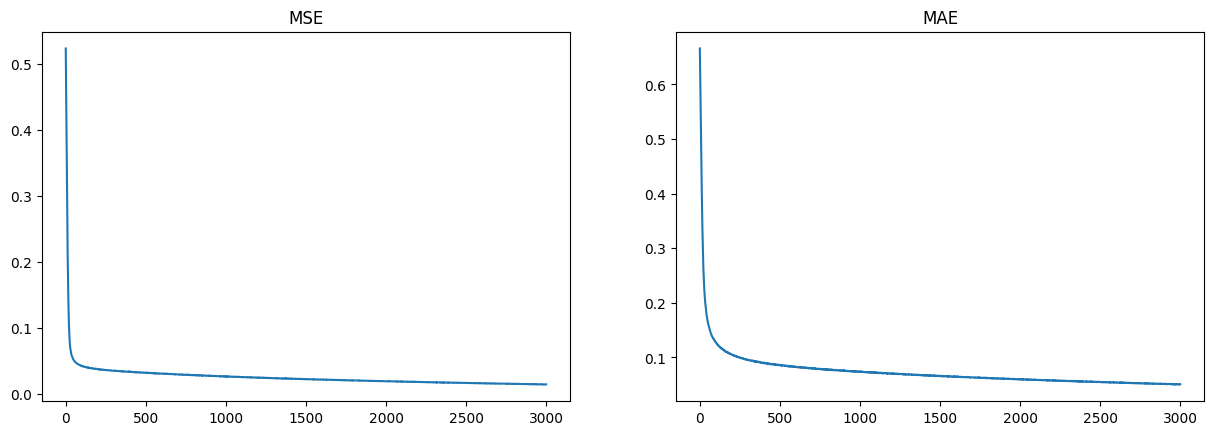

In [114]:
epochs = 3000
time_start = time.time()
hist = perceptron_four_classes.fit(X_four_train, y_four_train, batch_size=1, epochs=epochs, verbose=0, shuffle=True)
time_finish = time.time()
mse_loss, mae_loss = perceptron_four_classes.evaluate(X_train, y_train, verbose=0)

print(f'Fit time: {(time_finish - time_start):.{2}f}s')
print(f'Result MSE: {mse_loss}')
print(f'Result MAE: {mae_loss}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])

Плучаем веса и строим дискриминантную линию

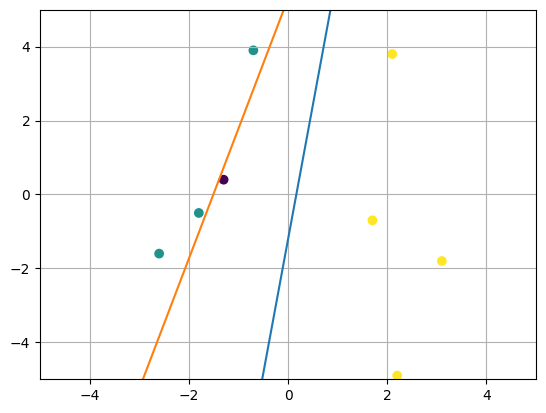

In [115]:
weights = perceptron_four_classes.layers[0].get_weights()
discriminant_line1 = lambda x: (weights[0][0][0]*x  + weights[1][0]) / -weights[0][1][0]
discriminant_line2 = lambda x: (weights[0][0][1]*x  + weights[1][1]) / -weights[0][1][1]

plt.grid()
plt.scatter(x_points, y_points, c = colors)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.plot([-6, 6], [discriminant_line1(-6), discriminant_line1(6)])
plt.plot([-6, 6], [discriminant_line2(-6), discriminant_line2(6)])